# Importing Dependencies

In [1]:
import pymongo
from pprint import pprint
from bson.objectid import ObjectId
import string
import operator
import re
print (pymongo.version)

4.3.3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establishing connection and retrieving data from MongoDB

## Connecting to the MongoDB

In [3]:
url = 'mongodb://localhost:27017/'
print (url)
myclient = pymongo.MongoClient(url)
print(myclient)

mongodb://localhost:27017/
MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


## Connecting to database

In [4]:
''' Database BIGDATACOURSEWORK will be connected next '''

mydb = myclient['BIGDATACOURSEWORK']
print (mydb)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'BIGDATACOURSEWORK')


In [5]:
mydb

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'BIGDATACOURSEWORK')

## Retrieving all documents from the necessary collection

In [6]:
mydb.list_collection_names()

['New York City Airbnb Listings File']

<b> This collection contains more than 40,000 documents that contain information about NYC's Airbnb rentals

<b> database.collection.find() will return all available documents in that corresponding collection. 

In [7]:
collection = mydb['New York City Airbnb Listings File'].find()

In [8]:
collection

<b> I will convert the collection to a list and pass it to a pandas DataFrame object to load all of our documents in pandas dataframe

In [9]:
df = pd.DataFrame(list(collection))

# Basic information about the data

In [10]:
df.head()

,_id,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bedrooms,license
0,6421707d8031041829152526,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,...,4.81,4.4,f,3,3,0,0,0.31,NaN,NaN
1,6421707d8031041829152527,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,...,4.94,4.92,f,1,0,1,0,0.73,1,NaN
2,6421707d8031041829152528,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,...,4.67,5.0,f,1,1,0,0,0.03,2,NaN
3,6421707d8031041829152529,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,...,4.47,4.52,f,2,0,2,0,0.30,1,NaN
4,6421707d803104182915252a,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,...,4.67,4.56,f,1,1,0,0,1.13,NaN,NaN


In [11]:
df.shape

(41533, 74)

<b> There are 41533 rows and 74 columns in our data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41533 entries, 0 to 41532
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   _id                                           41533 non-null  object
 1   id                                            41533 non-null  object
 2   listing_url                                   41533 non-null  object
 3   scrape_id                                     41533 non-null  object
 4   last_scraped                                  41533 non-null  object
 5   source                                        41533 non-null  object
 6   name                                          41522 non-null  object
 7   description                                   40748 non-null  object
 8   neighborhood_overview                         24090 non-null  object
 9   picture_url                                   41533 non-null  object
 10

In [13]:
nulls = dict(df.isnull().sum() / df.shape[0] * 100)

In [14]:
nulls =  {k: v for k, v in sorted(nulls.items(), reverse = True, key=lambda item: item[1])}

In [15]:
def is_not_zero(pair):
    key, value = pair

    if value > 0:
        return True
    else:
        return False

nulls = dict(filter(is_not_zero, nulls.items()))

In [16]:
keys = list(nulls.keys())
values = list(nulls.values())

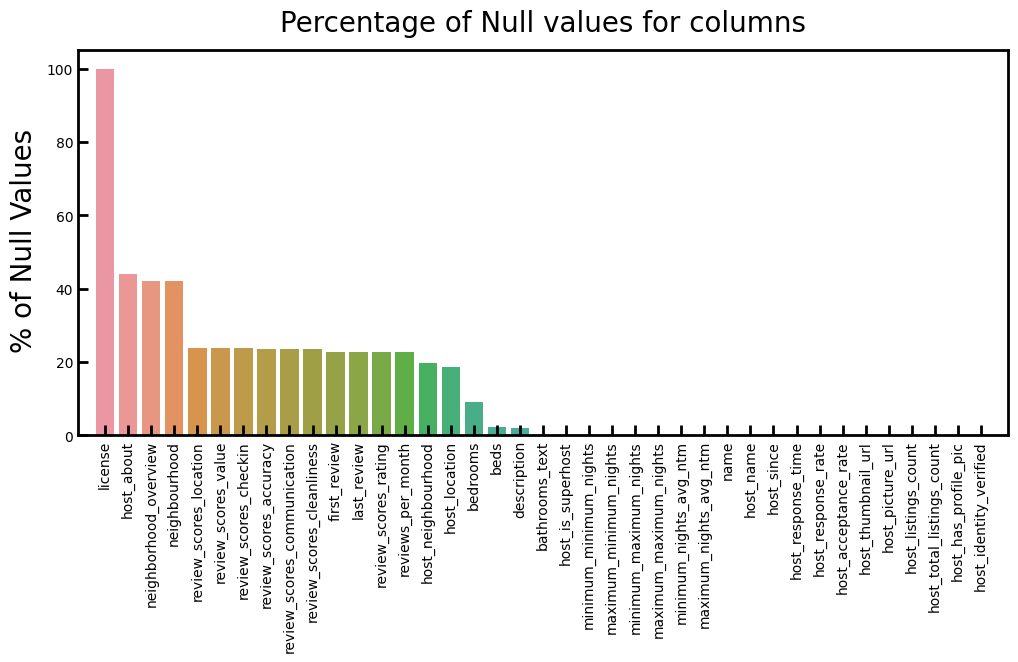

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = keys, y = values, ax = ax)

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.text(0.5, 1.05, 'Percentage of Null values for columns',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

# fig.text(0.5, -0.35, 'Columns', ha='center', va='center', fontsize = 20)
fig.text(0.08, 0.5, '% of Null Values', ha='center', va='center', rotation='vertical', fontsize = 20)

# plt.savefig('percentage_of_null_values.jpg',  bbox_inches='tight', dpi = 500)

It looks like we have two choices for columns with more than 30 % null values. 
    
    1. Either drop them, or
    2. Figure out a way to properly fill those null values

In [21]:
available_columns = df.columns;available_columns

Index(['_id', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       '

In [22]:
columns_that_are_dropped = []

In [23]:
data_dictionary = { 
    'id': 'The unique identifier of the Airbnb listing.',
    'listing_url': 'The URL of the Airbnb listing page.',
    'scrape_id': 'The unique identifier of the data scrape used to generate the Airbnb listing data.',
    'last_scraped': 'The date on which the Airbnb listing data was last scraped.', 
    'name': 'The name or title of the Airbnb listing.',
    'summary': 'A short summary of the Airbnb listing.',
    'space': 'A description of the space available in the Airbnb listing.',
    'description': 'A detailed description of the Airbnb listing.', 
    'experiences_offered' : 'A list of experiences offered by the Airbnb host.',
    'neighborhood_overview': 'An overview of the neighbourhood where the Airbnb listing is located.',
    'notes': 'Additional notes or information about the Airbnb listing.',
    'transit': 'Information about nearby public transportation options.',
    'access': 'Information about what areas of the Airbnb listing are accessible to guests.',
    'interaction': 'Information about how the Airbnb host will interact with guests.',
    'house_rules': 'Rules and policies set by the Airbnb host for guests.',
    'thumbnail_url': 'The URL of the Airbnb listing thumbnail image.',
    'medium_url': 'The URL of a medium-sized image of the Airbnb listing.',
    'picture_url': 'The URL of the main image of the Airbnb listing.',
    'xl_picture_url': 'The URL of an extra-large image of the Airbnb listing.',
    'host_id': 'The unique identifier of the Airbnb host who owns the listing.',
    'host_url': 'The URL of the Airbnb host page.',
    'host_name': 'The name of the Airbnb host who owns the listing.',
    'host_since': 'The date on which the Airbnb host joined the platform.',
    'host_location': 'The location of the Airbnb host.',
    'host_about': 'Information about the Airbnb host.',
    'host_response_time': 'The typical amount of time it takes for the Airbnb host to respond to messages.',
    'host_response_rate': 'The percentage of messages that the Airbnb host responds to.',
    'host_acceptance_rate': 'The percentage of booking requests that the Airbnb host accepts.',
    'host_is_superhost': 'A binary value indicating whether or not the Airbnb host is a Superhost.',
    'host_thumbnail_url': 'The URL of the Airbnb host\'s thumbnail image.', 
    'host_picture_url': 'The URL of the Airbnb host\'s main image.',
    'host_neighbourhood': 'The neighbourhood where the Airbnb host lives.',
    'host_listings_count': 'The number of listings that the Airbnb host has on the platform.',
    'host_total_listings_count': 'The total number of listings that the Airbnb host has on all platforms.',
    'host_verifications': 'A list of verification methods used by the Airbnb host.',
    'host_has_profile_pic': 'A binary value indicating whether or not the Airbnb host has a profile picture.',
    'host_identity_verified': 'A binary value indicating whether or not the Airbnb host\'s identity has been verified.',
    'neighbourhood': 'The neighbourhood where the Airbnb listing is located.',
    'neighbourhood_cleansed': 'The cleaned-up version of the neighbourhood name.',
    'neighbourhood_group_cleansed': 'The cleaned-up version of the neighbourhood group name.',
    'latitude': 'The latitude coordinate of the Airbnb listing.',
    'longitude': 'The longitude coordinate of the Airbnb listing.',
    'property_type': 'The type of property being listed on Airbnb (e.g. Apartment, House, etc.).',
    'room_type': 'The type of room being listed on Airbnb (e.g. Private room, Entire home/apt, etc.).',
    'accommodates': 'The maximum number of guests the Airbnb listing can accommodate.',
    'bathrooms': 'The number of bathrooms available in the Airbnb listing.',
    'bedrooms': 'The number of bedrooms available in the Airbnb listing.',
    'beds': 'The number of beds available in the Airbnb listing.',
    'bed_type': 'The type of bed available in the Airbnb listing (e.g. Real Bed, Futon, etc.).',
    'amenities': 'A list of amenities available in the Airbnb listing (e.g. Wifi, TV, etc.).',
    'square_feet': 'The size of the Airbnb listing in square feet.',
    'price': 'The nightly price of the Airbnb listing.',
    'weekly_price': 'The weekly price of the Airbnb listing.',
    'monthly_price': 'The monthly price of the Airbnb listing.',
    'security_deposit': 'The amount of security deposit required for the Airbnb listing.',
    'cleaning_fee': 'The cleaning fee charged for the Airbnb listing.',
    'guests_included': 'The number of guests included in the nightly price of the Airbnb listing.',
    'extra_people': 'The additional cost per guest after the number of guests included in the nightly price.',
    'minimum_nights': 'The minimum number of nights required to book the Airbnb listing.',
    'maximum_nights': 'The maximum number of nights allowed for a booking of the Airbnb listing.',
    'calendar_updated': 'The last time the Airbnb listing calendar was updated.',
    'has_availability': 'A binary value indicating whether or not the Airbnb listing is currently available.',
    'availability_30': 'The number of available nights in the next 30 days.',
    'availability_60': 'The number of available nights in the next 60 days.',
    'availability_90': 'The number of available nights in the next 90 days.',
    'availability_365': 'The number of available nights in the next 365 days.',
    'calendar_last_scraped': 'The date on which the Airbnb listing calendar was last scraped.',
    'number_of_reviews': 'The total number of reviews for the Airbnb listing.',
    'number_of_reviews_ltm': 'The total number of reviews for the Airbnb listing in the last 12 months.',
    'first_review': 'The date of the first review for the Airbnb listing.',
    'last_review': 'The date of the most recent review for the Airbnb listing.',
    'review_scores_rating': 'The average rating score for the Airbnb listing.',
    'review_scores_accuracy': 'The average accuracy score for the Airbnb listing.',
    'review_scores_cleanliness': 'The average cleanliness score for the Airbnb listing.',
    'review_scores_communication': 'The average communication score for the Airbnb listing.',
}

In [24]:
# pd.DataFrame(data_dictionary.values(), 
# columns = data_dictionary.keys())

# Data Cleaning

In [25]:
def check_column_presence(column):
    try:
        if df[column].shape[0] > 0:
            return 'Column |{}| is Present'.format(column)
        else:
            return None
    except:
        return "Column |{}| has been removed !! ".format(column)

In [26]:
# testing the function
check_column_presence('availability_365')

'Column |availability_365| is Present'

In [27]:
df['amenities']

0        ["Carbon monoxide alarm", "Stove", "Bathtub", ...
1        ["Hair dryer", "Smoke alarm", "Carbon monoxide...
2        ["HDTV with Disney+, HBO Max, standard cable, ...
3        ["Heating", "Wifi", "Long term stays allowed",...
4        ["Carbon monoxide alarm", "Shampoo", "Stove", ...
                               ...                        
41528    ["Smoke alarm", "Wifi", "Exercise equipment", ...
41529    ["Smoke alarm", "First aid kit", "Wifi", "TV",...
41530    ["Hair dryer", "Smoke alarm", "Carbon monoxide...
41531    ["Smoke alarm", "Carbon monoxide alarm", "Firs...
41532    ["Carbon monoxide alarm", "Shampoo", "Conditio...
Name: amenities, Length: 41533, dtype: object

## Dropping useless individual columns

### 1. `_id` column

In [28]:
df['_id'].unique().shape

(41533,)

This column is simply generated by Mongodb by assignng a unique value to each document/rows while uploading the file.
We don't need this column, which is why we will proceed to drop this column.

In [29]:
df.drop('_id', axis = 1, inplace = True)

In [30]:
check_column_presence('_id')

'Column |_id| has been removed !! '

In [31]:
columns_that_are_dropped.append('_id')

### 2. `id` column

In [32]:
df['id'].shape

(41533,)

Each rental is assigned a unique ID. So, this column is also not necessary.

In [33]:
df.drop('id', axis = 1, inplace = True)

In [34]:
check_column_presence('id')

'Column |id| has been removed !! '

In [35]:
columns_that_are_dropped.append('id')

### 3. `listing_url` column

In [36]:
df['listing_url'].unique().shape

(41533,)

Likewise, this column contains the listing URL for the corresponding rentals. We can remove this column as it does not contain any useful information.

In [37]:
df.drop('listing_url', axis = 1, inplace = True)

In [38]:
check_column_presence('listing_url')

'Column |listing_url| has been removed !! '

In [39]:
columns_that_are_dropped.append('listing_url')

### 4. `scrape_id` column

In [40]:
df['scrape_id'].unique().shape

(1,)

In [41]:
df['scrape_id'].unique()

array(['20221204162430'], dtype=object)

This column has only one unique value which is why we will proceed to remove this column as well. 

In [42]:
df.drop('scrape_id', axis = 1, inplace = True)

In [43]:
check_column_presence('scrape_id')

'Column |scrape_id| has been removed !! '

In [44]:
columns_that_are_dropped.append('scrape_id')

### 5. `last_scraped` column

In [45]:
df['last_scraped'].unique()

array(['2022-12-05', '2022-12-04'], dtype=object)

It looks like Airbnb scraped all of their data from database at the end of 2022, which is why two date values belonging to december are only present in this column. So, we can safely drop this column as well.

In [46]:
df.drop('last_scraped', axis = 1, inplace = True)

In [47]:
check_column_presence('last_scraped')

'Column |last_scraped| has been removed !! '

In [48]:
columns_that_are_dropped.append('last_scraped')

### 6. `source` column

In [49]:
available_columns[5]

'source'

In [50]:
df['source'].unique()

array(['city scrape', 'previous scrape'], dtype=object)

This column contains the source from where Airbnb retrieved their data. So, we can remove this column. 

In [51]:
df.drop('source', axis = 1, inplace = True)
check_column_presence('source')

'Column |source| has been removed !! '

In [52]:
columns_that_are_dropped.append('source')

### 7. `name` column

In [53]:
available_columns[6]

'name'

In [54]:
df['name']

0                           Skylit Midtown Castle
1              Cozy Clean Guest Room - Family Apt
2        Spacious Brooklyn Duplex, Patio + Garden
3                                 BlissArtsSpace!
4                Only 2 stops to Manhattan studio
                           ...                   
41528                                     Dahiari
41529                          Beautiful Basement
41530                  Central Park Close By - 24
41531                     Good Vibes at The Bronx
41532           2 bedroom Condo near West Village
Name: name, Length: 41533, dtype: object

This column contains names of each Airbnb rentals

In [55]:
df['name'].sample(10).values

array(['Amazing loft close to everything',
       'Williamsburg 3-Bed Townhouse w/ Garden by L Train',
       'Tucked Away Inn-Ideal For Long Stays -5 min to LGA',
       'Large modern apartment with a view',
       'Spacious Private Ground Floor Studio Apt.',
       'NEW PENTHOUSE W/ HUGE PRIVATE ROOFTOP EAST VILLAGE',
       'Lovely bedroom near Central Park',
       'Hermoso apartamento (habitaciones compartidas)',
       'Lotus Flower-Lovely 3-Bedroom Apt, Flatbush Bklyn',
       'Huge private room in Williamsburg'], dtype=object)

some of the names of the Airbnb rentals contain the location of the rentals. Since we have other columns precisely providing the location of the rentals, we can proceed to safely remove this column.

In [56]:
df.drop('name', axis = 1, inplace = True)
check_column_presence('name')

'Column |name| has been removed !! '

In [57]:
columns_that_are_dropped.append('name')

### 8. `description` column

In [58]:
available_columns[7]

'description'

In [59]:
df['description']

0        Beautiful, spacious skylit studio in the heart...
1        Our best guests are seeking a safe, clean, spa...
2        We welcome you to stay in our lovely 2 br dupl...
3        One room available for rent in a 2 bedroom apt...
4        Comfortable studio apartment with super comfor...
                               ...                        
41528    Desconecta de tus preocupaciones en este espac...
41529    Your family will be close to everything when y...
41530    This is a Three-Bedroom Apartment. You will ha...
41531    Keep it simple at this peaceful and centrally-...
41532    This beautifully decorated condo will give you...
Name: description, Length: 41533, dtype: object

This column is also useless for analysis as it contains description of each Airbnb rentals.

In [60]:
df.drop('description', axis = 1, inplace = True)
check_column_presence('description')

'Column |description| has been removed !! '

In [61]:
columns_that_are_dropped.append('description')

### 9. `neighborhood_overview` column

In [62]:
available_columns[8]

'neighborhood_overview'

In [63]:
df['neighborhood_overview'].isnull().sum()

17443

In [64]:
df['neighborhood_overview'].dropna()

0        Centrally located in the heart of Manhattan ju...
1        Our neighborhood is full of restaurants and ca...
5          Theater district, many restaurants around here.
6        Location: Five minutes to Central Park, Museum...
7        This sweet Harlem sanctuary is a 10-20 minute ...
                               ...                        
41493    Woodlawn Heights is a fun and safe community. ...
41497    ▶What's nearby <br />• In Manhattan <br />• Ti...
41521    Prime Flatiron / Nomad location in middle of M...
41523    This busy convenient location provides quick a...
41525    The Most BEAUTIFUL NYC Skyline View From The C...
Name: neighborhood_overview, Length: 24090, dtype: object

We won't need this column as well as we already have columns containing neighbourhood information. 

In [65]:
df.drop('neighborhood_overview', axis = 1, inplace = True)
check_column_presence('neighborhood_overview')

'Column |neighborhood_overview| has been removed !! '

In [66]:
columns_that_are_dropped.append('neighborhood_overview')

### 10. `host_id` column

In [67]:
available_columns[10]

'host_id'

In [68]:
df['host_id']

0             2845
1             7490
2             7378
3             7356
4            15991
           ...    
41528    125534010
41529    338424773
41530      2653479
41531    421264574
41532    481177884
Name: host_id, Length: 41533, dtype: object

Each Airbnb rental's host will have unique host id. So, we can proceed to drop this column as well.

In [69]:
df.drop('host_id', axis = 1, inplace = True)
check_column_presence('host_id')
columns_that_are_dropped.append('host_id')

### 11. `host_url` column

In [70]:
available_columns[11]

'host_url'

In [71]:
df['host_url']

0             https://www.airbnb.com/users/show/2845
1             https://www.airbnb.com/users/show/7490
2             https://www.airbnb.com/users/show/7378
3             https://www.airbnb.com/users/show/7356
4            https://www.airbnb.com/users/show/15991
                            ...                     
41528    https://www.airbnb.com/users/show/125534010
41529    https://www.airbnb.com/users/show/338424773
41530      https://www.airbnb.com/users/show/2653479
41531    https://www.airbnb.com/users/show/421264574
41532    https://www.airbnb.com/users/show/481177884
Name: host_url, Length: 41533, dtype: object

This column contains the URL of each Airbnb's hosts' profiles. So, we can safely drop this column as it will be of no further use to us.

In [72]:
df.drop('host_url', axis = 1, inplace = True)
check_column_presence('host_url')
columns_that_are_dropped.append('host_url')

### 12. `host_name` column

In [73]:
available_columns[12]

'host_name'

In [74]:
df['host_name']

0             Jennifer
1            MaryEllen
2              Rebecca
3                Garon
4        Allen & Irina
             ...      
41528          Larissa
41529               Md
41530          Richard
41531           Aridio
41532           Steven
Name: host_name, Length: 41533, dtype: object

In [75]:
df['host_name'].unique().shape

(9629,)

Each Airbnb rental's host will have a name. Therefore, this column will not be of much use to us.

In [76]:
df.drop('host_name', axis = 1, inplace = True)
check_column_presence('host_name')
columns_that_are_dropped.append('host_name')

### 13. `host_since` column

In [77]:
available_columns[13]

'host_since'

In [78]:
df['host_since']

0        2008-09-09
1        2009-02-05
2        2009-02-03
3        2009-02-03
4        2009-05-06
            ...    
41528    2017-04-12
41529    2020-02-24
41530    2012-06-16
41531    2021-09-02
41532    2022-09-26
Name: host_since, Length: 41533, dtype: object

This column contains information about the date since when the Airbnb rental has been opened up for hosting services.

In [79]:
df['host_since'] = pd.to_datetime(df['host_since'])

<b> Since we will be predicting the rental's price, we would be focusing more on the properties of individual rental. So, date from which a rental has been open should not matter much in predicting price. 

In [80]:
df['host_since'].isnull().sum()

5

In [81]:
available_columns[13]

'host_since'

In [82]:
df.drop('host_since', axis = 1, inplace = True)
check_column_presence('host_since')
columns_that_are_dropped.append('host_since')

### 14. `host_about` column

In [83]:
available_columns[15]

'host_about'

In [84]:
df['host_about']

0        A New Yorker since (Phone number hidden by Air...
1        Welcome to family life with my oldest two away...
2        Rebecca is an artist/designer, and Henoch is i...
3         I am an artist(painter, filmmaker) and curato...
4        We love to travel. When we travel we like to s...
                               ...                        
41528                                                  NaN
41529                                                  NaN
41530                   I love to travel and meet people. 
41531                                                  NaN
41532                                                  NaN
Name: host_about, Length: 41533, dtype: object

In [85]:
df['host_about'].sample(5)

41085                                                  NaN
8801      Holistic Health Consultant, and Friendly person.
1769     Professional Performing and Teaching Musician/...
38509    I have always taken a passion in discovering n...
24051                                                  NaN
Name: host_about, dtype: object

In [86]:
df['host_about'].isnull().sum()

18297

This column doesn't contain any useful information. So, we will proceed to drop this columns.

In [87]:
df.drop('host_about', axis = 1, inplace = True)
check_column_presence('host_about')
columns_that_are_dropped.append('host_about')

In [88]:
len(columns_that_are_dropped)

14

### 15. `host_location` column

In [89]:
available_columns[14]

'host_location'

In [90]:
df['host_location']

0              New York, NY
1              New York, NY
2              New York, NY
3              New York, NY
4              New York, NY
                ...        
41528    Dominican Republic
41529                   NaN
41530          New York, NY
41531                   NaN
41532                   NaN
Name: host_location, Length: 41533, dtype: object

In [91]:
df['host_location'].isnull().sum()

7745

It looks like this column contains information about the location of the Airbnb's rental's hosts' locations. Furthermore, a foreigner can also host a rental through Airbnb. But, the price of a Airbnb rental should not matter at all as we are predicting price of a rental in NYC and not in other countries. Nonetheless, lets check the number of rentals foreign residents own in NYC.   

In [92]:
host_location = df['host_location'].dropna()
host_location = host_location.apply(lambda x : x.split(",")[-1])
host_location = host_location.value_counts()

In [93]:
host_location

 NY                    25682
 United States          4348
 CA                      624
 FL                      395
United States            326
                       ...  
U.S. Virgin Islands        1
 Czechia                   1
 Iceland                   1
India                      1
Dominican Republic         1
Name: host_location, Length: 151, dtype: int64

It looks like residents of different US states and countries own a NYC Airbnb rentals. Lets proceed to sum up all observations for states and United states from the above series to get the total count of all residents in the US owning a NYC Airbnb rentals.

In [94]:
host_location = dict(host_location)

In [95]:
total_individual_countries_count = {}

In [96]:
count = 0
for key, val in host_location.items():   
    if len(key) == 3 or key in ['United States', ' United States']:
        # print(key)
        count += val
        
total_individual_countries_count['USA'] = count

In [97]:
for key, val in host_location.items():
    if len(key) != 3 and key not in ['United States', ' United States']:
        # print(key)
        total_individual_countries_count[key] = val

In [100]:
total_individual_countries_count = dict(sorted(total_individual_countries_count.items(), reverse = True,key=lambda item: item[1]))

In [101]:
total_individual_countries_count

{'USA': 32798,
 ' France': 145,
 ' United Kingdom': 129,
 ' Canada': 77,
 ' Germany': 50,
 ' Australia': 43,
 ' Spain': 36,
 ' Italy': 35,
 ' Brazil': 32,
 ' Israel': 25,
 ' Colombia': 24,
 ' Mexico': 24,
 ' China': 21,
 ' India': 20,
 ' Switzerland': 17,
 'Hong Kong': 15,
 ' Sweden': 12,
 ' Dominican Republic': 11,
 ' Ireland': 11,
 ' New Zealand': 11,
 ' Argentina': 9,
 ' South Korea': 9,
 ' Netherlands': 8,
 ' Puerto Rico': 8,
 ' Belgium': 8,
 'Singapore': 7,
 ' Turkey': 7,
 ' Portugal': 7,
 ' Lebanon': 7,
 ' Denmark': 7,
 ' Japan': 7,
 ' Hungary': 6,
 'China': 6,
 'Israel': 6,
 ' Russia': 6,
 ' Ecuador': 6,
 ' Austria': 6,
 ' Greece': 6,
 ' United Arab Emirates': 5,
 ' Costa Rica': 5,
 'France': 4,
 ' Poland': 4,
 ' Jamaica': 4,
 ' Uruguay': 4,
 'Jamaica': 3,
 'Colombia': 3,
 'Mexico': 3,
 ' Nigeria': 3,
 ' Bulgaria': 3,
 ' Curaçao': 3,
 ' Latvia': 3,
 ' Kazakhstan': 3,
 ' Norway': 3,
 'United Kingdom': 3,
 ' Chile': 3,
 ' Taiwan': 3,
 ' South Africa': 3,
 ' Finland': 3,
 ' Thailan

In [102]:
df.drop('host_location', axis = 1, inplace = True)
check_column_presence('host_location')
columns_that_are_dropped.append('host_location')

In [103]:
# available_host_countries = df['host_location'].apply(lambda x : x.split(',')[-1])

### 16. `host_response_time` column

In [104]:
available_columns[16]

'host_response_time'

In [105]:
df['host_response_time']

0              within a day
1                       N/A
2                       N/A
3              within a day
4            within an hour
                ...        
41528        within an hour
41529    within a few hours
41530        within an hour
41531                   N/A
41532    within a few hours
Name: host_response_time, Length: 41533, dtype: object

In [106]:
df['host_response_time'].isnull().sum()

5

Since there are only 5 null values, there should not be much problem filling these values.

In [107]:
df['host_response_time'].value_counts()

within an hour        18063
N/A                   13640
within a few hours     5997
within a day           3201
a few days or more      627
Name: host_response_time, dtype: int64

Majority of Airbnb hosts seem to respond within an hour. This column will be useful. Additionally, I will change the N/A values to unknown. I will also fill null values as unknown respectively.

In [108]:
df['host_response_time'] = df['host_response_time'].replace(to_replace = 'N/A', value = 'Unknown')

In [110]:
df['host_response_time'] = df['host_response_time'].fillna('Unknown')

In [117]:
df['host_response_time'].value_counts(), df['host_response_time'].isnull().sum()

(within an hour        18063
 Unknown               13645
 within a few hours     5997
 within a day           3201
 a few days or more      627
 Name: host_response_time, dtype: int64,
 0)

In [118]:
dictionary = dict(df['host_response_time'].value_counts())

Text(0.04, 0.5, 'Host Response Time')

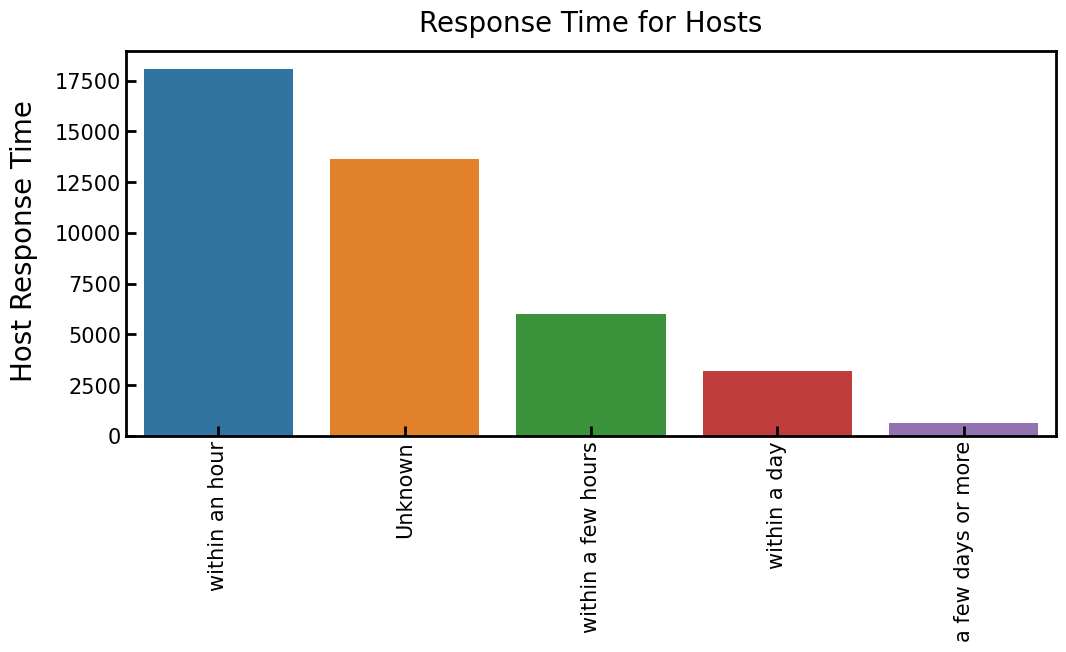

In [127]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = list(dictionary.keys()), y = list(dictionary.values()), ax = ax)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Response Time for Hosts',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

# fig.text(0.5, -0.35, 'Time', ha='center', va='center', fontsize = 20)
fig.text(0.04, 0.5, 'Host Response Time', ha='center', va='center', rotation='vertical', fontsize = 20)


It is clear that majority of hosts respond within an hour. Similarly, there is a huge section of hosts whose responses were either not recorded properly or did not respond at all. The price of a rental might depend upon this column due to the fact that quickly responding to potential customers about rental information could be an important factors for guest to decide to book a particular rental. For now, we will keep this column and later do additional analysis to check if we will really need this column for modelling purposes.

In [593]:
# df.drop('host_name', axis = 1, inplace = True)
# check_column_presence('host_name')
# columns_that_are_dropped.append('host_about')

### 17. `host_response_rate` column

In [131]:
available_columns[17]

'host_response_rate'

In [132]:
df['host_response_rate']

0         72%
1         N/A
2         N/A
3         90%
4        100%
         ... 
41528    100%
41529    100%
41530     98%
41531     N/A
41532     83%
Name: host_response_rate, Length: 41533, dtype: object

In [133]:
df['host_response_rate'].unique()

array(['72%', 'N/A', '90%', '100%', '94%', '33%', '80%', '60%', '91%',
       '99%', '0%', '93%', '67%', '83%', '50%', '88%', '78%', '92%',
       '63%', '75%', '82%', '86%', '70%', '71%', '89%', '96%', '40%',
       '73%', '20%', '98%', '97%', '64%', '85%', '87%', '25%', '62%',
       '43%', '84%', '56%', nan, '58%', '95%', '38%', '13%', '10%', '22%',
       '65%', '17%', '14%', '44%', '81%', '79%', '57%', '61%', '77%',
       '69%', '26%', '55%', '76%', '30%', '29%', '46%', '68%', '31%',
       '74%', '53%', '54%', '41%', '51%'], dtype=object)

In [134]:
df['host_response_rate'].isnull().sum()

5

Only five null values shouldn't be a problem

### 18. `host_acceptance_rate` column

In [598]:
available_columns[18]

'host_acceptance_rate'

In [599]:
df['host_acceptance_rate']

0         22%
1         N/A
2         50%
3         82%
4        100%
         ... 
41528    100%
41529    100%
41530     86%
41531     N/A
41532    100%
Name: host_acceptance_rate, Length: 41533, dtype: object

In [600]:
df['host_acceptance_rate'].isnull().sum()

5

In [601]:
df['host_acceptance_rate'].unique()

array(['22%', 'N/A', '50%', '82%', '100%', '13%', '54%', '98%', '96%',
       '97%', '0%', '83%', '95%', '86%', '85%', '46%', '40%', '67%',
       '10%', '25%', '99%', '87%', '88%', '33%', '38%', '20%', '61%',
       '73%', '60%', '65%', '64%', '30%', '94%', '89%', '91%', '93%',
       '78%', '35%', '5%', '36%', '75%', '53%', '43%', '39%', '70%',
       '80%', '92%', '23%', '17%', '49%', '76%', '63%', '69%', '57%',
       '74%', '62%', '79%', '21%', '90%', '84%', '14%', '71%', '81%',
       '77%', '55%', '72%', '15%', '29%', '44%', '45%', '47%', '19%',
       '56%', '68%', '28%', '52%', '59%', '34%', '48%', '27%', '18%',
       '66%', '58%', '7%', '42%', '11%', '32%', '16%', '51%', '26%',
       '12%', '41%', nan, '37%', '4%', '8%', '31%', '9%', '6%', '24%'],
      dtype=object)

### 19. `host_is_superhost` column

In [602]:
available_columns[19]

'host_is_superhost'

In [603]:
df['host_is_superhost'].isnull().sum()

29